### TPC Benchmarking  
Results Plotting  

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.0})

In [44]:
fpb = "/home/colin/data/tpc_logs/"

In [45]:
fps = ["bq_h_query_times-100GB-h_100GB_01-default-2020-05-01 09:54:14.099669.csv",
       "bq_h_query_times-100GB-h_100GB_02-part & cluster A-2020-05-01 10:31:11.485879.csv"]

In [46]:
# type of test being plotted, choose one.
x_type = "query_n"
#x_type = "stream_p"

In [5]:
def parse(fp, x_type):
    x_type = {"q":"query_n", "s":"stream_p"}[x_type]
    df = pd.read_csv(fp)
    df.t0 = pd.to_datetime(df.t0)
    df.t1 = pd.to_datetime(df.t1)
    df["dt"] = df.t1 - df.t0
    df["dt_s"] = df.dt.dt.total_seconds()
    return df

In [7]:
df = pd.DataFrame(None)
for _fp in fps:
    _df = parse(fpb + _fp, "q")
    df = pd.concat([df, _df])

In [162]:
df["description"] = df.desc

In [163]:
dfp_dt = df.pivot(index="query_n", columns="description", values="dt_s")  #.plot.bar(figsize=(10,5));
dfp_bp = df.pivot(index="query_n", columns="description", values="bytes_processed")  #.plot.bar(figsize=(10,5));

In [164]:
def bytes_to_TebiByte(b):
    return b / 1099511627776

In [165]:
dfp_bp = dfp_bp.apply(bytes_to_TebiByte)

In [168]:
sns.set_style("darkgrid", {"xtick.bottom":True})

In [179]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
set2 = sns.color_palette("Set2", 8)
hls = sns.hls_palette(n_colors=6)

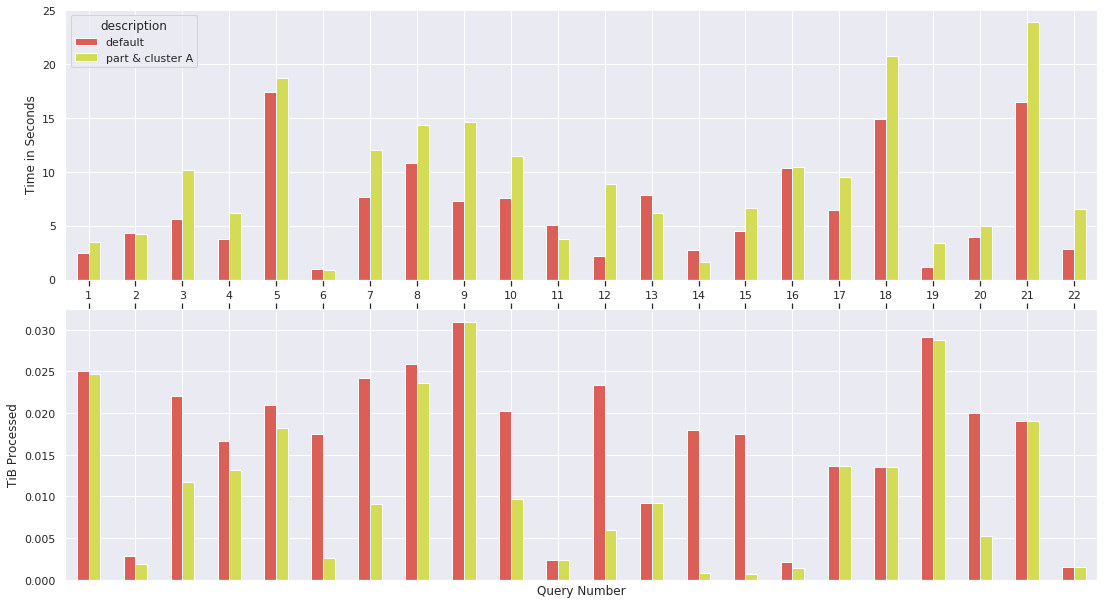

In [180]:
color_palette = hls
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1 = dfp_dt.plot.bar(ax=ax1, legend=True, color=color_palette)
ax2 = dfp_bp.plot.bar(ax=ax2, legend=False, color=color_palette);

# set the figure size BEFORE adjusting ticks
fig.set_size_inches(18.5, 10.5)

ax1.set_ylabel("Time in Seconds")
ax1.set_xlabel(None)
ax1_xticklabels = ax1.get_xticklabels()
ax1.set_xticklabels(labels=[]) #, rotation=0)

ax2.set_ylabel("TiB Processed")
ax2.set_xlabel("Query Number")
ticks =  ax2.get_yticks()
ticks = ["{:01.3f}".format(abs(tick)) for tick in ticks]
ax2.set_yticklabels(ticks);
ax2.xaxis.tick_top()

plt.subplots_adjust(hspace=0.11)
print();